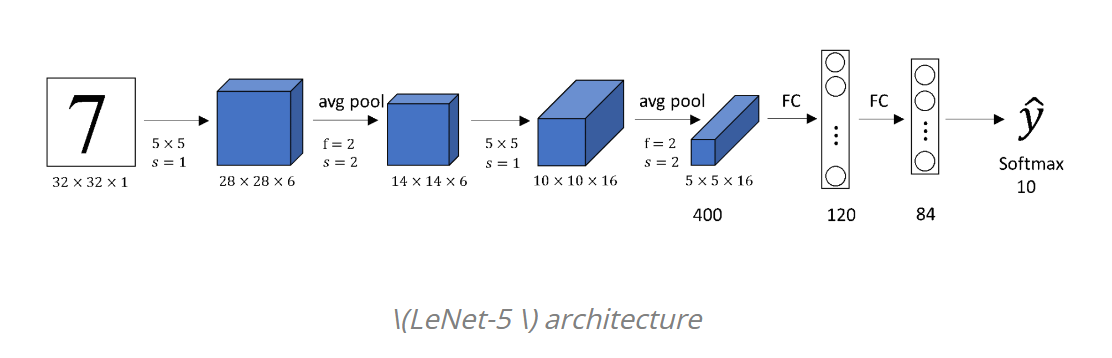

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from keras import Sequential
from keras.datasets import mnist

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalization
x_train /=255
x_test /=255

In [4]:
# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [5]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

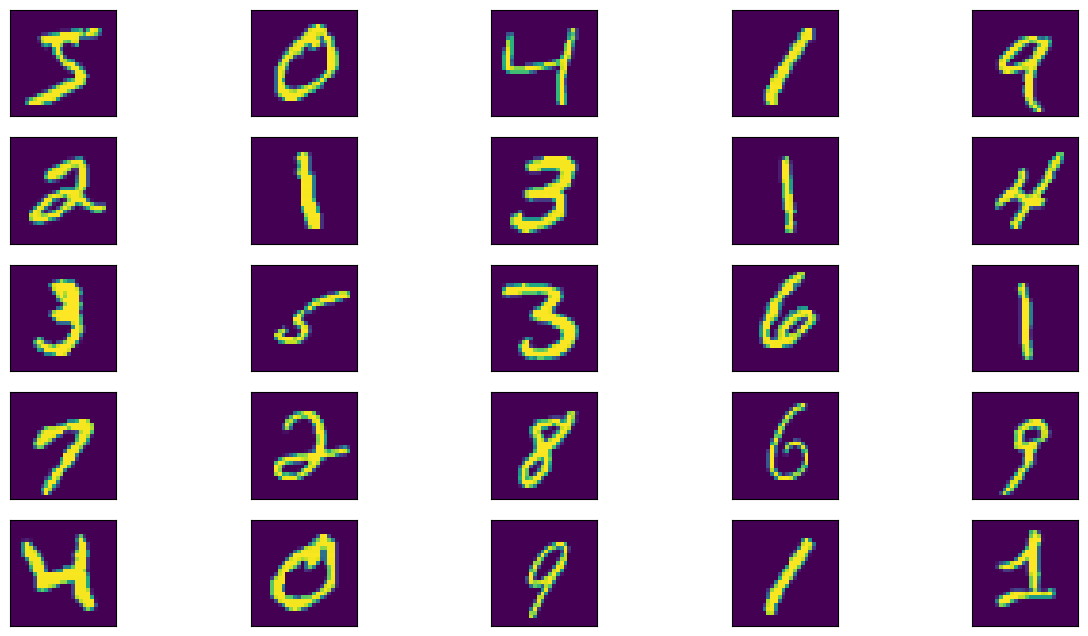

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
plt.show()

In [11]:
import numpy as np
#from keras.utils import np_utils
from tensorflow.python.keras.utils import np_utils

In [12]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [13]:
model  = Sequential()

# Conv Layer 1
model.add(Conv2D(6, kernel_size=(5,5), padding='valid', strides=1, activation='relu', input_shape=(28,28,1)))
# Avg pooling - replace with max pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Conv Layer 2
model.add(Conv2D(16, kernel_size=(5,5), strides=1, padding='valid', activation='relu'))
# Avg pooling - replace with max pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Flatten : 2D to 1D
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(120, activation='relu'))
# Fully Connected Layer 2
model.add(Dense(84, activation='relu'))
# Output Layer
model.add(Dense(10, activation='softmax'))

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [14]:
model.compile(optimizer='Adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [15]:
from keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor= "val_loss", patience= 5, verbose= 1, restore_best_weights= True)

In [17]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), callbacks=earlystopping)

Epoch 1/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0532 - accuracy: 0.9834 - val_loss: 0.0527 - val_accuracy: 0.9844
Epoch 2/100
938/938 [==============================] - 4s 5ms/step - loss: 0.0413 - accuracy: 0.9875 - val_loss: 0.0468 - val_accuracy: 0.9855
Epoch 3/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0353 - accuracy: 0.9884 - val_loss: 0.0365 - val_accuracy: 0.9883
Epoch 4/100
938/938 [==============================] - 4s 5ms/step - loss: 0.0307 - accuracy: 0.9898 - val_loss: 0.0373 - val_accuracy: 0.9875
Epoch 5/100
938/938 [==============================] - 5s 5ms/step - loss: 0.0250 - accuracy: 0.9916 - val_loss: 0.0345 - val_accuracy: 0.9893
Epoch 6/100
938/938 [==============================] - 4s 5ms/step - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.0378 - val_accuracy: 0.9884
Epoch 7/100
938/938 [==============================] - 4s 4ms/step - loss: 0.0193 - accuracy: 0.9933 - val_loss: 0.0385 - val_accuracy: 0.9880